# Convolutions and sliding windows

Plots inline:

In [1]:
%matplotlib inline

Imports:

In [2]:
import os

import numpy as np

from matplotlib import pyplot as plt

from scipy.ndimage import convolve

from skimage.filters import gabor_kernel
from skimage.color import rgb2grey
from skimage.util.montage import montage2d
from skimage.util import view_as_windows
from skimage.transform import downscale_local_mean


Some utility functions for making an image montage for display and padding images:

In [14]:
def image_montage(im_3d, padding=1, cval=None, grid_shape=None):
    if cval is None:
        return montage2d(np.pad(im_3d, [(0,0), (padding, padding), (padding, padding)], mode='constant'),
                        grid_shape=grid_shape)
    else:
        return montage2d(np.pad(im_3d, [(0,0), (padding, padding), (padding, padding)], mode='constant',
                                constant_values=[(0,0), (cval,cval), (cval,cval)]), grid_shape=grid_shape)

def pad_image(img, shape):
    d0 = shape[0]-img.shape[0]
    d1 = shape[1]-img.shape[1]
    p0a = d0/2
    p0b = d0-p0a
    p1a = d1/2
    p1b = d1-p1a    
    return np.pad(img, [(p0a, p0b), (p1a, p1b)], mode='constant')

Load a photo of some fruit:

(1536, 1536)


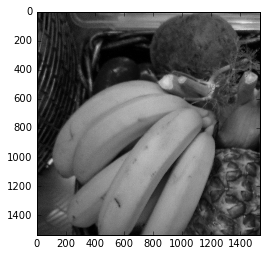

In [16]:
IMAGE_PATH = os.path.join('images', 'fruit.JPG')
# Extract a square block
img = rgb2grey(plt.imread(IMAGE_PATH)[:1536,:1536])
print img.shape
plt.imshow(img, cmap='gray')
plt.show()

Scale down by a factor of 8:

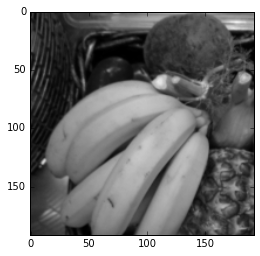

In [23]:
img_small = downscale_local_mean(img, (8,8))

plt.imshow(img_small, cmap='gray')
plt.show()

Construct a single Gabor filter kernel with a wavelength of 8 and an angle of 60 degrees and select the imaginary component.

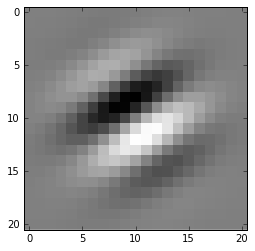

In [21]:
WAVELENGTH = 8.0
THETA = np.pi / 3.0
k_complex = gabor_kernel(1.0/WAVELENGTH, THETA, 1.2)
k_imag = np.imag(k_complex)
        
plt.imshow(k_imag, cmap='gray', interpolation='none')
plt.imsave('images/single_kernel.png', k_imag, cmap='gray')

Extract 128x128 windows from the image, with a spacing of 32 pixels, convolve with the Gabor kernel constructed above and make a montage of the result:

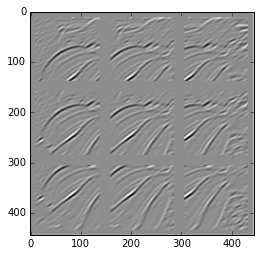

In [22]:
windows = view_as_windows(img_small, (128,128), (32,32))
grid_shape = windows.shape[:2]
windows = windows.reshape((-1, 128,128))

window_feats = [-convolve(1-windows[i], k_imag)   for i in range(windows.shape[0])]

feats_3d = np.concatenate([c[None,:,:]   for c in window_feats], axis=0)
feats_montage = image_montage(feats_3d, padding=10, grid_shape=grid_shape)
plt.imshow(feats_montage, cmap='gray', interpolation='none')
plt.imsave('images/fruit_window_montage.png', feats_montage, cmap='gray')